# GR 5221 Final Project

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Section 1: Exloratory Analysis

### 1.1 Load Data

In [2]:
df =  pd.read_csv('all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

### 1.2 Reframe the dataframe
- Choose company `AAL` only
- Choose column `date` and `close`

In [4]:
AAL = df[df['Name'] == 'AAL']
ALL_1 = AAL.loc[:, ['date', 'close']]
ALL_1['date'] = pd.to_datetime(ALL_1['date'], format="%Y/%m/%d")
ALL_1.head()

,date,close
0,2013-02-08,14.75
1,2013-02-11,14.46
2,2013-02-12,14.27
3,2013-02-13,14.66
4,2013-02-14,13.99


There is no null value in the dataframe.

In [5]:
ALL_1.isnull().sum()

date     0
close    0
dtype: int64

### 1.3 Visualization

Text(0.5, 1.0, 'All Close Price History Of AAL')

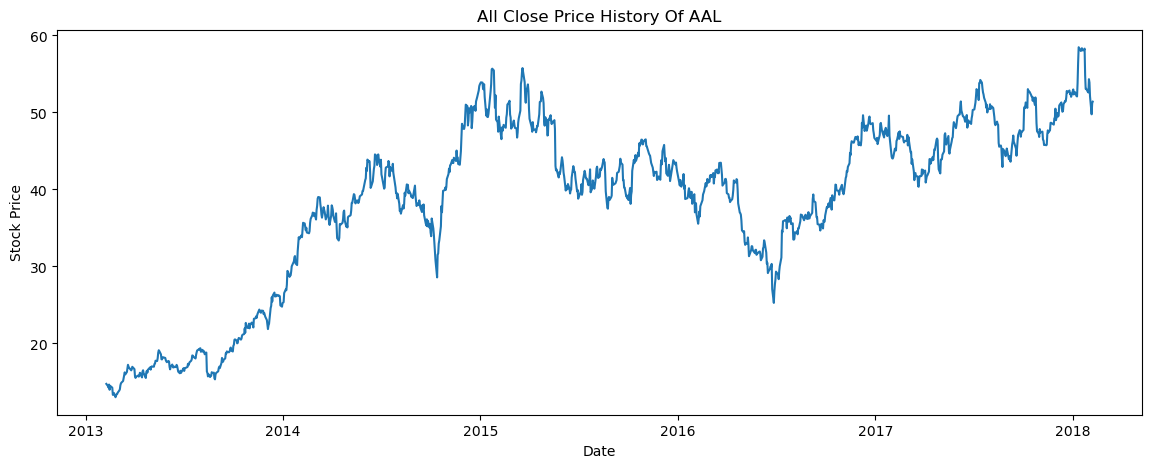

In [6]:
fig, ax = plt.subplots(figsize=(14,5))
ax.plot(ALL_1['date'], ALL_1['close'])
ax.set_xlabel("Date")
ax.set_ylabel("Stock Price")
ax.set_title("All Close Price History Of AAL")

Text(0.5, 1.0, '1st Order Differencing')

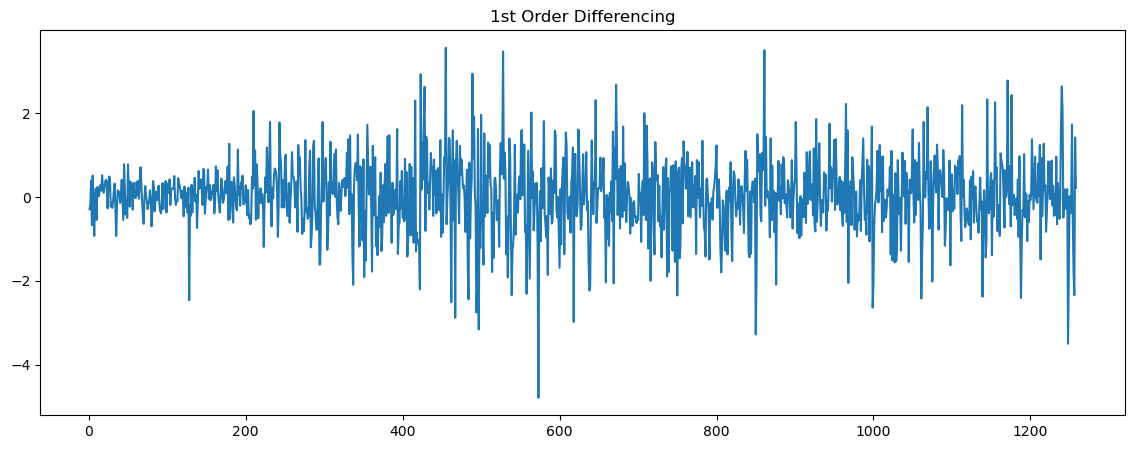

In [7]:
fig, axes = plt.subplots(figsize=(14,5))
axes.plot(ALL_1.close.diff()); axes.set_title('1st Order Differencing')

Text(0.5, 1.0, '3rd Order Differencing')

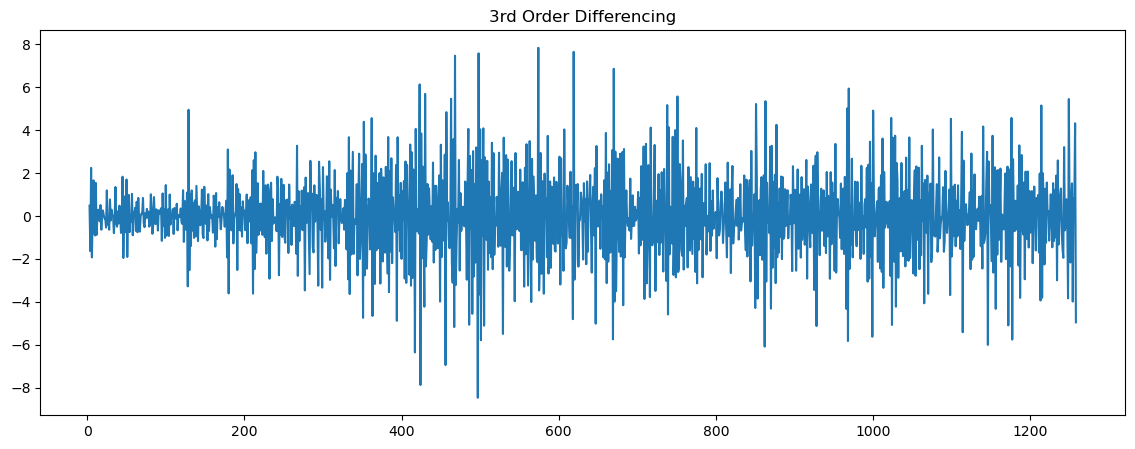

In [8]:
fig, axes = plt.subplots(figsize=(14,5))
axes.plot(ALL_1.close.diff().diff().diff()); axes.set_title('3rd Order Differencing')


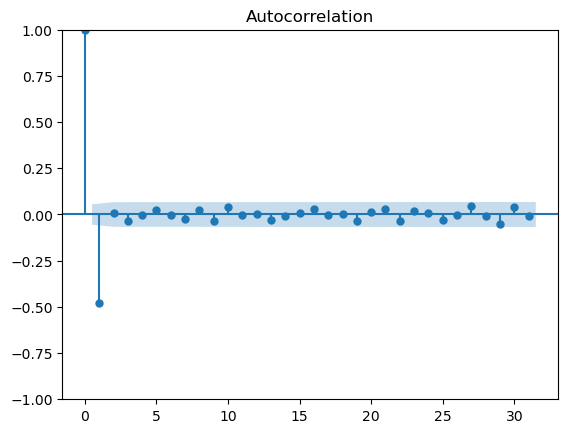

In [9]:
plot_acf(ALL_1.close.diff().diff().dropna());

/Users/wanghan/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


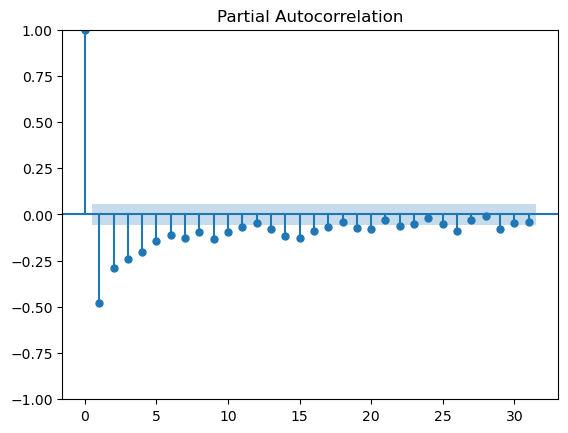

In [10]:
plot_pacf(ALL_1.close.diff().diff().dropna());

## Section 2: Time Series Model and Modeling Process 
### 2.1 AR(1) and MA(1)

In [41]:
from statsmodels.tsa.arima.model import ARIMA
# model1 is AR(1)
model1 = ARIMA(ALL_1.close, order = (1,0,0))
# model2 is MA(1)
model2 = ARIMA(ALL_1.close, order = (0,0,1))
model_fit1 = model1.fit()
model_fit2 = model2.fit()

/Users/wanghan/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


We found that the ARIMA model predict the time series with high accurarcy

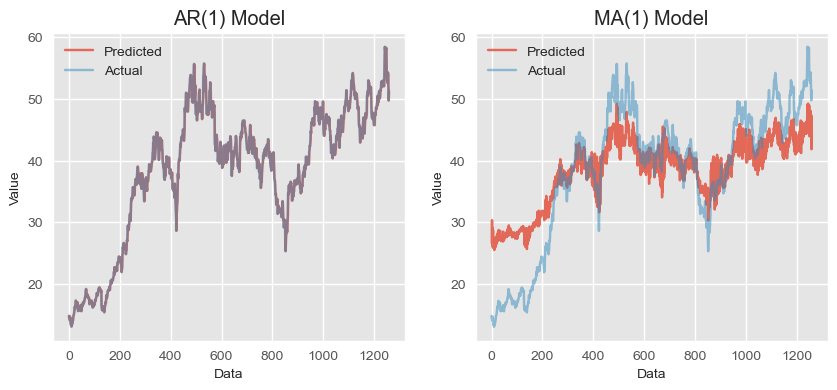

In [50]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
pred1 = model_fit1.predict(dynamic = False)
pred2 = model_fit2.predict(dynamic = False)
plt.style.use('ggplot')

# plot actual values and predicted values
ax1.plot(pred1[1:], label='Predicted', alpha = 0.8)
ax1.plot(ALL_1.close, label='Actual', alpha = 0.5)
ax1.set_title('AR(1) Model')
ax1.set_xlabel('Data')
ax1.set_ylabel('Value')
ax1.legend()


ax2.plot(pred2[1:], label='Predicted', alpha = 0.8)
ax2.plot(ALL_1.close, label='Actual', alpha = 0.5)
ax2.set_title('MA(1) Model')
ax2.set_xlabel('Data')
ax2.set_ylabel('Value')
ax2.legend()

plt.show()

### 2.2 ARIMA

### 2.3 More Model

## Section 3: Model Validation

### 3.1 AIC

### 3.2 BIC

## Section 4: Forecasting

### 4.1 LSTM

## Section 5: ~